## 1. Event and Experimental Probability

When asked: *What's the probability of landing Tails when tossing a (fair) coin?* You'd (probably) answer: $\frac{1}{2}$. Or 50%. But what does that mean?

And when asked: *What's the probability of getting 6 when throwing a six-sided (fair) die?* The expected answer: $\frac{1}{6}$ *What about NOT getting 6?* It's: $\frac{5}{6}$. And *getting a number less than five?* $\frac{2}{3}$? But what do those numbers mean?

And and - *The probability of drawing an Ace from a (fair) deck of cards?*

---

Let's get back to the coin. $\frac{1}{2}$ says you. But what does it mean? Maybe you ment that out of two tossings you'll land exactly one Tails ($TH$ or $HT$)? Okay, let's toss a coin two times. I got $TT$. Maybe my assumption was wrong? Or I've just got unlucky? Let's toss it again. $HT$ this time. Maybe I'm actually right? Or I got lucky. Another two tosses! $HH$. Hmm... Unlucky again? But can I talk about luck in mathematics and in hypothesis testing?

What about the other answer: 50%. Does that mean that I'll land Tails exactly half the times when tossing a coin $N$ times? Let's toss it, say, 10 times. But I don't actually have a coin. Luckily I have Python which can simulate tossing a coin. 

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

rng = np.random.default_rng(seed=1023)

In [2]:
coin = ['H', 'T']

tossing = rng.choice(coin, size=10)
tossing

array(['H', 'H', 'T', 'T', 'T', 'T', 'H', 'T', 'H', 'T'], dtype='<U1')

6 of 10 Tails. Close, but not quite 50%. But, wait. 50% also means 50/100. Let's toss a coin 100 times then. 

In [3]:
tossing = rng.choice(coin, size=100)
tossing

array(['T', 'H', 'H', 'H', 'T', 'H', 'T', 'T', 'H', 'T', 'H', 'H', 'T',
       'H', 'T', 'H', 'H', 'H', 'T', 'T', 'H', 'T', 'H', 'H', 'H', 'H',
       'T', 'H', 'H', 'T', 'H', 'H', 'T', 'T', 'H', 'H', 'H', 'T', 'H',
       'T', 'H', 'H', 'T', 'H', 'T', 'H', 'T', 'H', 'T', 'T', 'H', 'H',
       'H', 'H', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'H', 'T', 'H', 'T',
       'T', 'T', 'T', 'H', 'H', 'H', 'H', 'H', 'H', 'T', 'H', 'H', 'H',
       'T', 'T', 'T', 'T', 'H', 'T', 'H', 'T', 'T', 'H', 'H', 'T', 'T',
       'H', 'T', 'H', 'T', 'T', 'T', 'H', 'H', 'H'], dtype='<U1')

How many Tails, then?

In [4]:
np.unique(tossing, return_counts=True)

(array(['H', 'T'], dtype='<U1'), array([53, 47], dtype=int64))

47/100. Not bad. But not quite 50%. Lucky, but not as quite? (But can I talk about luck in mathematics and in hypothesis testing?) What if those 50% is actually an *approximation* of the result? Let's toss a coin 1000 times.  

In [5]:
tossing = rng.choice(coin, size=1000)
np.unique(tossing, return_counts=True)

(array(['H', 'T'], dtype='<U1'), array([480, 520], dtype=int64))

520/1000. That's 52%. And that's not that quite bad *approximation*. But still... Now, let's toss a coin ONE MILLION TIMES.

In [6]:
tossing = rng.choice(coin, size=10**6)
np.unique(tossing, return_counts=True)

(array(['H', 'T'], dtype='<U1'), array([500537, 499463], dtype=int64))

In [7]:
499463/10**6

0.499463

Well - that's 49.95%, almost 50%. Quite good approximation. 

What if tossed a coin more than million times?

In [8]:
tossing = rng.choice(coin, size=10**7)
np.unique(tossing, return_counts=True)

(array(['H', 'T'], dtype='<U1'), array([4999908, 5000092], dtype=int64))

In [9]:
5000092/10**7

0.5000092

This is even better, veeeery close to 50%; 50.001%, to be more exact.

And if we tossed a coin **infinitely many times**? Then there is no approximation. We'd get 50% sharp. Mathematically, we can write this

$$ P(T) = \lim_{N_{\rm TRIES}\rightarrow\infty}\frac{n_{\rm HITS}}{N_{\rm TRIES}} = 0.5 = \frac{1}{2}.$$

What are all these letters? Let's interpret this formula one by one. 

- $T$ is the *event*: event of landing Tails when tossing ONE coin. 


- $P$ is the *probability*: we may consider it as a function which *measures* how probable an event is. So, $P(T)$ is probability of langing Tails when tossing one coin. 


- $N_{\rm TRIES}$ is the number of trials of the SAME experiment. In our case, it's the number of tossing a coin. 


- $n_{\rm HITS}$ is the number of 'hits', i.e. the number of desired outcomes in our set of trials. In our case, it's the number of Tails landed. 


- $\lim_{N_{\rm TRIES}\rightarrow\infty}$ is the *limit*: a value of the fraction $\frac{n_{\rm HITS}}{N_{\rm TRIES}}$ which we would obtain if we would *theoretically* be able to toss a coin infinitely many times in our finite lives. But we can't do that. We can only obtain an *experimental* (or *statistical*) approximation of the *theoretical* value in finite number of trials. And as we demonstrated - the larger number of trials, the better the approximation. 

***

Let's now illustrate this *limit* on another example: rolling a six-sided die. Intuintively we say that the probability of getting a 6 is $\frac{1}{6}$, or 16.666...% . Similarly as with the coin, we'll simulate rolling a die for various numbers of trials and list the results, i.e. approximations of theoretical probability.

In [38]:
exp_prob_df = pd.DataFrame(columns=['No. of Rolls', 'No. of 6s', 'Experimental Probability'])

number_of_rolls = np.logspace(1.75, 7, 100, dtype=int).tolist()
number_of_6s = []
die = list(range(1, 7))
           
for n_rolls in number_of_rolls:
    rolling = rng.choice(die, size=n_rolls)
    
    results = np.unique(rolling, return_counts=True)
    n_6 = results[1][-1]
    number_of_6s.append(n_6)

number_of_6s = np.asarray(number_of_6s)

exp_prob_df['No. of Rolls'] = number_of_rolls
exp_prob_df['No. of 6s'] = number_of_6s
exp_prob_df['Experimental Probability'] = np.round(number_of_6s/number_of_rolls, 5)
    
    
print(exp_prob_df.to_markdown())

|    |     No. of Rolls |        No. of 6s |   Experimental Probability |
|---:|-----------------:|-----------------:|---------------------------:|
|  0 |     56           |     12           |                    0.21429 |
|  1 |     63           |      6           |                    0.09524 |
|  2 |     71           |     13           |                    0.1831  |
|  3 |     81           |     16           |                    0.19753 |
|  4 |     91           |     20           |                    0.21978 |
|  5 |    103           |     15           |                    0.14563 |
|  6 |    116           |     16           |                    0.13793 |
|  7 |    132           |     21           |                    0.15909 |
|  8 |    149           |     26           |                    0.1745  |
|  9 |    168           |     33           |                    0.19643 |
| 10 |    190           |     32           |                    0.16842 |
| 11 |    215           |     32      

And here's how our accumulation point looks like:

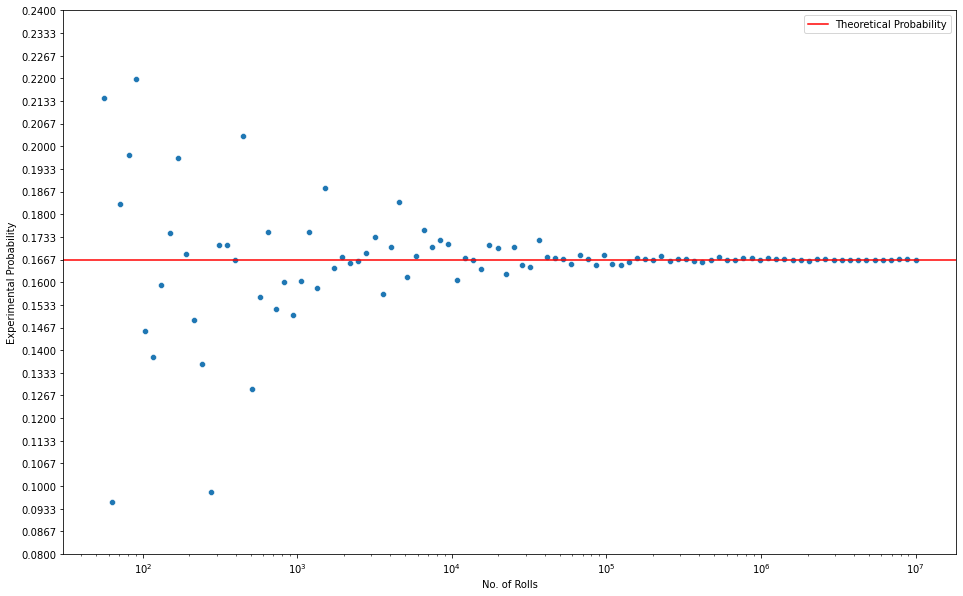

In [67]:
fig, ax = plt.subplots(figsize=(16, 10))

sns.scatterplot(ax = ax, data = exp_prob_df, x='No. of Rolls', y='Experimental Probability');
ax.axhline(.16667, c='r')

ax.set_xscale('log')
ax.set_yticks(np.linspace(.08, .24, 25))
ax.legend(['Theoretical Probability']);

From the scatterplot above we see how the values of ratio $\frac{n_{\rm HITS}}{N_{\rm TRIES}}$ converge towards the predicted theoretical probability of 16.666...% as $N_{\rm TRIES}\rightarrow\infty$.

But, is there a way to calculate theoretical probability **exactly**?

## 2. $\sigma$-Algebra of Events and Theoretical Probability

In order to be able to speak properly about theoretical probability (and be able to compute it), we need to introduce *$\sigma$-algebra of events* and *probability-as-a-measure*. We can consider $\sigma$-algebra of events as a family of sets where every set is an event, and every element of this event-set is an *outcome* for which consider the evenet realized, i.e. a *favorable outcome*. 

For example, if we toss a coin two times, then one event-set might be

$$ A - {\rm Landed\ 1\ Heads\ and\ 1\ Tails}, $$

and its elements are

$$ A = \{HT, TH\}.$$

A set of all the possible outcomes for a given experiment/observation is called the *universal set*. It is denoted by $\Omega$ and it is the set upon which $\sigma$-algebra of events is built upon, from the subsets $A\subset\Omega$ of the universal set.  

For tossing a coin two times we have

$$ \Omega = \{HH, HT, TH, TT\},$$

and obviously

$$ A \subset \Omega. $$

Let $\Sigma$ be a $\sigma$-algebra of events on $\Omega$, and $A$ and $B$ two events (which we write $A, B\in \Sigma$). Then we have:

$$1^\circ\quad \emptyset,\ \Omega \in \Sigma$$

$$2^\circ\quad A^C \in \Sigma$$

$$3^\circ\quad A\cup B \in \Sigma$$

$$4^\circ\quad A\cap B \in \Sigma.$$

What do these cryptic messages even mean? Let's explain them one by one, I promise they make sense.

$$1^\circ\quad \emptyset,\ \Omega \in \Sigma$$

This means that the empty set $\emptyset$ and the total set $\Omega$ are also considered as events.

$\emptyset$ is called an *impossible event*, and it does not contain any (possible) outcome. 

$\Omega$, viewed as an event is called *certain event* - getting any outcome from all the possible outcomes is definitely a certain event. 

---

$$2^\circ\quad A^C \in \Sigma$$

An complementary set of $A$: $A^C = \Omega\setminus A$ is also considered as an event. Every unfavourable outcome of $A$ is favourable for $A^C$ (and vice versa). So, for the event $A$ as defined above, we have:

$$ A^C = \{HH, TT\}. $$

---

$$3^\circ\quad A\cup B \in \Sigma$$

A union of two events (denoted also as $A + B$) is also considered as an event. But what is a union of two events actually? We say that the event $A\cup B$ is realized when at least one of the events $A$ **OR** $B$ is realized. $A\cup B$ contains all the outcomes which are favourable for either the event $A$ **OR** event $B$.

For example, if we define event $B$ as

$$B - {\rm Landed\ 2\ Tails,}$$

we have 

$$ A\cup B = \{HT, TH, TT\}.$$

---

$$4^\circ\quad A\cap B \in \Sigma.$$

An intersection of two events (denoted also as AB) is also considered as an event. We say that the event $AB$ is realized when both events $A$ **AND** $B$ are simultaneously realized. $AB$ contains all the outcomes which are favourable for both events $A$ **AND** $B$. 

For examle, if we define event $C$ as 

$$ C - {\rm Tails\ in\ the\ first\ coin\ toss}, $$

we have 

$$ AC = \{HT, TH\} \cap \{TH, TT\} = \{TH\}.$$

Two events $A$ and $B$ are *mutually exclusive* if $A\cap B = \emptyset$, i.e. if realization of both events simultaneously is an impossible event.

---